In [2]:
from google.colab import drive #mounting my google drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#importing necessary packages and libraries needed

import pandas as pd #for preprocessing and analysis
from pandas import DataFrame as df
import time #tracking the speed of loading dataset and imported libraries
import numpy as np #for preprocessing and analysis/statistical calculations
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
#importing the dataset from google drive

spotify = pd.read_csv('gdrive/My Drive/Medium Projects/Spotify Data/data.csv')
genre = pd.read_csv('gdrive/My Drive/Medium Projects/Spotify Data/data_by_genres.csv')
super_genre = pd.read_json('gdrive/My Drive/Medium Projects/Spotify Data/super_genres.json')
artist = pd.read_csv('gdrive/My Drive/Medium Projects/Spotify Data/data_by_artist.csv')

In [19]:
spotify.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


In [20]:
#dropping the columns that aren't needed
spotify.drop("Unnamed: 0",axis=1, inplace=True)

In [ ]:
#quick look at the spotify df

spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168592 entries, 0 to 168591
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      168592 non-null  float64
 1   artists           168592 non-null  object 
 2   danceability      168592 non-null  float64
 3   duration_ms       168592 non-null  int64  
 4   energy            168592 non-null  float64
 5   explicit          168592 non-null  int64  
 6   id                168592 non-null  object 
 7   instrumentalness  168592 non-null  float64
 8   key               168592 non-null  int64  
 9   liveness          168592 non-null  float64
 10  loudness          168592 non-null  float64
 11  mode              168592 non-null  int64  
 12  name              168592 non-null  object 
 13  popularity        168592 non-null  int64  
 14  release_date      168592 non-null  object 
 15  speechiness       168592 non-null  float64
 16  tempo             16

In [ ]:
#check for columns containing null values in the dataset

spotify.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
#quick summary of our spotify df

spotify.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,168592.000000,168592.000000,1.685920e+05,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000
mean,0.501360,0.533648,2.327016e+05,0.488577,0.071516,0.169476,5.196795,0.205151,-11.358180,0.709446,31.626862,0.083616,116.918295,0.528497,1977.457774
std,0.377993,0.175919,1.223921e+05,0.267346,0.257685,0.315383,3.504587,0.175896,5.670176,0.454019,21.393260,0.119917,30.726527,0.264457,25.406757
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.097800,0.412000,1.721600e+05,0.265000,0.000000,0.000000,2.000000,0.098200,-14.388000,0.000000,13.000000,0.034800,93.500750,0.315000,1957.000000
50%,0.515000,0.543000,2.091330e+05,0.480000,0.000000,0.000264,5.000000,0.134000,-10.466000,1.000000,34.000000,0.044600,114.795000,0.539000,1978.000000
75%,0.896000,0.662000,2.637070e+05,0.709000,0.000000,0.111000,8.000000,0.259000,-7.135000,1.000000,48.000000,0.072300,135.733500,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.968000,244.091000,1.000000,2020.000000


In [ ]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


## **Did the world become happier?**

***Trend of Tempo and Danceability***

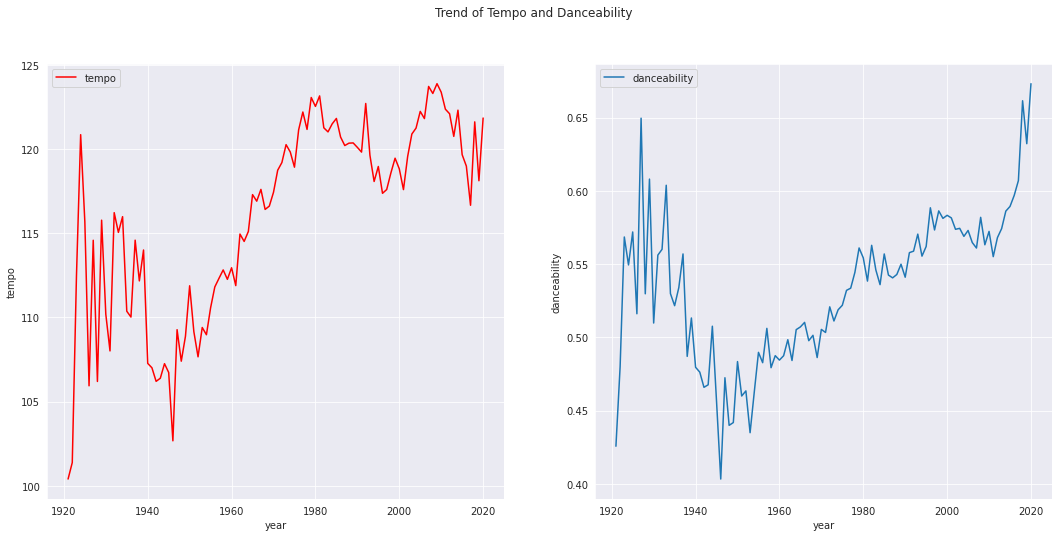

In [ ]:
#plotting tempo and dance-ability to see if thers's a similar pattern in both

f, axes = plt.subplots(1,2, figsize=(18,8))
ax=sns.set_style("darkgrid")

sns.lineplot(x="year", y="tempo", data=spotify, ax=axes[0],color="red", label="tempo", err_style=None)
sns.lineplot(x="year", y="danceability", data=spotify, ax=axes[1], label="danceability", err_style=None)
plt.suptitle("Trend of Tempo and Danceability", fontsize=12)
plt.savefig("Tempo and Danceability.png")

***Trend of valence***

<Figure size 720x432 with 0 Axes>

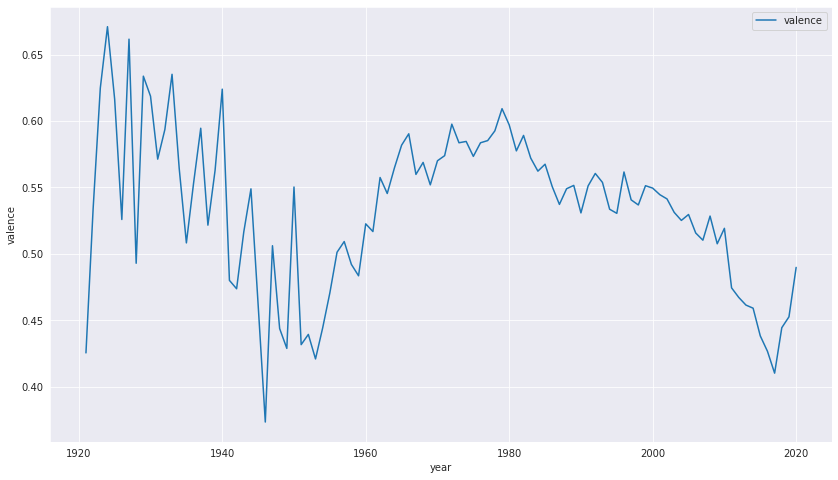

In [ ]:
#plotting valence

plt.figure(figsize=(10, 6))

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.lineplot(x=spotify["year"], y=spotify["valence"], label="valence", err_style=None,)

In [ ]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


In [ ]:
genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.983000,0.218500,1.496130e+05,0.018350,0.874000,0.112800,-37.256000,0.038750,69.526500,0.062900,40.500000,1,1
1,432hz,0.485070,0.330000,1.059273e+06,0.463084,0.480393,0.118862,-17.099000,0.086288,125.227125,0.217675,52.125000,6,1
2,[],0.686395,0.516830,2.305397e+05,0.397491,0.202883,0.221324,-12.773475,0.109871,111.933224,0.513905,21.556669,7,1
3,a cappella,0.666036,0.576732,1.961439e+05,0.334535,0.028486,0.128292,-13.011177,0.106782,112.461108,0.502521,38.786415,11,1
4,abstract,0.352395,0.489100,3.429772e+05,0.509300,0.788033,0.122317,-13.812100,0.044157,124.176500,0.354130,41.600000,1,1


In [ ]:
artist.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,Francisco Canaro,0.983072,0.654711,177776.513454,0.292622,0.490675,0.201118,-11.733373,0.111007,123.608786,0.746469,0.054257,2,1,2267
1,Frédéric Chopin,0.989961,0.340087,251871.948502,0.106874,0.876899,0.155677,-22.575578,0.042913,90.977772,0.203644,5.748127,1,1,1068
2,Ludwig van Beethoven,0.955019,0.340157,439361.331606,0.153176,0.690770,0.164078,-20.107704,0.055550,104.833536,0.260255,5.237306,0,1,965
3,Wolfgang Amadeus Mozart,0.962084,0.353895,327808.037306,0.138348,0.514837,0.187091,-20.214154,0.067756,108.594920,0.332855,9.624870,7,1,965
4,Johann Sebastian Bach,0.958405,0.354224,203461.757872,0.201932,0.744322,0.165837,-20.936518,0.048844,106.551869,0.570526,14.704669,7,1,921


# **Biggest Winners?**

In [ ]:
#grouping the top 10 popular genres into a new df called popularity

popularity = genre.groupby("genres")["popularity"].sum().to_frame().sort_values(["popularity"], ascending=False).head(10)

In [ ]:
popularity

,popularity
genres,
russian dance,85.000000
guaracha,82.000000
circuit,82.000000
r&b en espanol,78.446154
dutch urban,78.000000
dong-yo,78.000000
ritmo kombina,77.000000
chinese hip hop,76.000000
indie triste,76.000000


***Most Popular Genres***

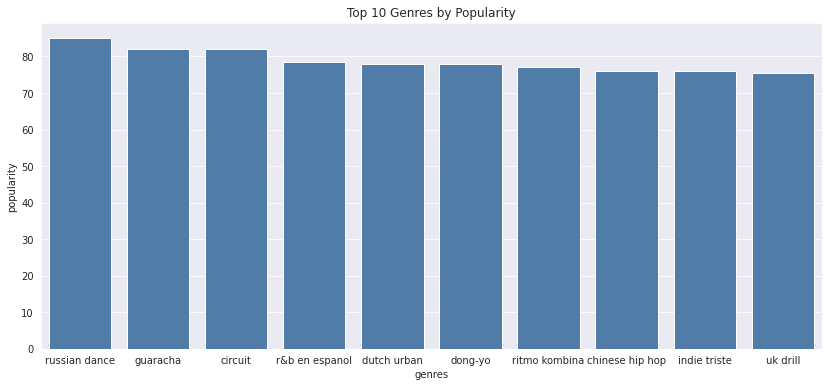

In [ ]:
#plotting the top 10 popular genres

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
plt.title("Top 10 Genres by Popularity")

sns.barplot(x=popularity.index, y="popularity", data=popularity, color="#437CB6")

In [ ]:
#getting the (mean values of some of the)features of the top 10 popular genres and putting it into a new df called pop

pop = genre.groupby("genres")[["popularity","acousticness","tempo","danceability","valence","speechiness","loudness", "liveness", "energy", "instrumentalness"]].mean().sort_values(["popularity"], ascending=False).head(10)

In [ ]:
pop

,popularity,acousticness,tempo,danceability,valence,speechiness,loudness,liveness,energy,instrumentalness
genres,,,,,,,,,,
russian dance,85.000000,0.005610,126.091000,0.653000,0.326000,0.095900,-2.6340,0.439000,0.945000,0.915000
guaracha,82.000000,0.009030,128.031000,0.745000,0.556000,0.077400,-3.5060,0.297000,0.972000,0.465000
circuit,82.000000,0.009030,128.031000,0.745000,0.556000,0.077400,-3.5060,0.297000,0.972000,0.465000
r&b en espanol,78.446154,0.274831,134.531315,0.745015,0.537846,0.157413,-4.8676,0.117165,0.641785,0.002416
dutch urban,78.000000,0.170500,133.030500,0.766000,0.743000,0.098750,-3.6610,0.251800,0.774500,0.000052
dong-yo,78.000000,0.259000,115.056000,0.829000,0.777000,0.112000,-1.7460,0.055900,0.886000,0.000000
ritmo kombina,77.000000,0.216000,169.990000,0.767000,0.536000,0.101000,-5.2250,0.080600,0.643000,0.000104
chinese hip hop,76.000000,0.359000,89.968000,0.409000,0.168000,0.087800,-7.7310,0.167000,0.678000,0.000005
indie triste,76.000000,0.946000,104.950000,0.830000,0.189000,0.038300,-14.4610,0.362000,0.159000,0.000020


In [ ]:
#normalized the pop df using the Min-Max method of normalization

norm_pop = (pop-pop.min()) / (pop.max()-pop.min())

#pop df was normalized in order to constrain the different measurement of each variable to between 0 and 1

In [ ]:
norm_pop

,popularity,acousticness,tempo,danceability,valence,speechiness,loudness,liveness,energy,instrumentalness
genres,,,,,,,,,,
russian dance,1.000000,0.000000,0.451413,0.441230,0.259442,0.223083,0.930161,1.000000,0.966790,1.000000
guaracha,0.684211,0.003637,0.475657,0.607595,0.637110,0.151433,0.861581,0.629340,1.000000,0.508197
circuit,0.684211,0.003637,0.475657,0.607595,0.637110,0.151433,0.861581,0.629340,1.000000,0.508197
r&b en espanol,0.310121,0.286286,0.556888,0.607623,0.607301,0.461321,0.754495,0.159920,0.593831,0.002640
dutch urban,0.263158,0.175342,0.538133,0.645570,0.944171,0.234121,0.849390,0.511355,0.757073,0.000057
dong-yo,0.263158,0.269452,0.313514,0.759494,1.000000,0.285438,1.000000,0.000000,0.894219,0.000000
ritmo kombina,0.157895,0.223726,1.000000,0.647378,0.604269,0.242835,0.726386,0.064474,0.595326,0.000114
chinese hip hop,0.052632,0.375791,0.000000,0.000000,0.000000,0.191712,0.529296,0.290003,0.638376,0.000005
indie triste,0.052632,1.000000,0.187224,0.761302,0.034483,0.000000,0.000000,0.799008,0.000000,0.000022


***Features of Top 10 Popular Genres***

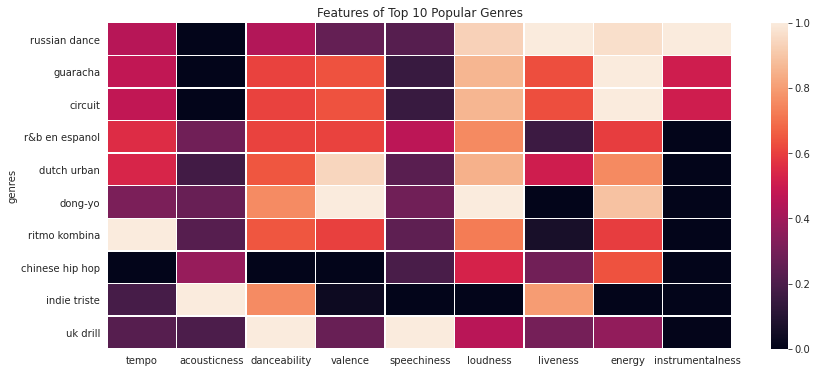

In [ ]:
#plotting top 10 popular genres to on heatmap

plt.figure(figsize=(14, 6))
plt.title("Features of Top 10 Popular Genres")

sns.heatmap(norm_pop[["tempo","acousticness",	"danceability", 	"valence", 	"speechiness", 	"loudness", 	"liveness", 	"energy", 	"instrumentalness"]], annot=False,linewidths=.5)

***Most Popular Songs***

In [ ]:
#creating a new df from sorting the global by popularity and grouping it by year

pop_year = spotify.sort_values('popularity', ascending=False).groupby('year').first()

#the .first() method picks the most popular song in each year

In [ ]:
pop_year = pop_year.reset_index()
pop_year.head()

,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence
0,1921,0.732,['Dennis Day'],0.819,180533,0.3410,0,7xPhfUan2yNtyFG0cUWkt8,0.00000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.963
1,1922,0.674,['Uli'],0.645,126903,0.4450,0,35iwgR4jXetI318WEWsa1Q,0.74400,0,0.151,-13.338,1,Carve,10,1922-02-22,0.4510,104.851,0.127
2,1923,0.996,['Bessie Smith'],0.614,177133,0.0423,0,2wAfHM7Whz67VFbdanhZlk,0.00293,4,0.183,-12.033,1,Nobody Knows You When You're Down and Out,45,1923,0.0535,89.822,0.211
3,1924,0.816,"['Paul Whiteman & His Orchestra', 'Bix Beiderb...",0.678,206000,0.3950,0,59UEylF5pnWCXm91Hzk2Q9,0.24000,3,0.100,-9.825,1,Mississippi Mud,13,1924,0.1330,184.446,0.832
4,1925,0.969,['Tommy Dorsey'],0.678,194320,0.1750,0,3XDharvL8vEyxdQwOQKmww,0.00105,3,0.177,-13.021,1,"On the Sunny Side of the Street (From ""Is Ever...",39,1925,0.0301,112.941,0.580


In [ ]:
pop_year = pop_year[["year", "artists", "name", "popularity"]]

#selecting the columns we need for out visualization

In [ ]:
pop_year = pop_year.sort_values("popularity", ascending=False)

In [ ]:
#filtering our df to pick the last 50 years after 1971

pop_2000s = pop_year[pop_year["year"]>1971].head(10)
pop_2000s.head()

,year,artists,name,popularity
99,2020,['The Weeknd'],Blinding Lights,100
98,2019,['Roddy Ricch'],The Box,97
97,2018,['Trevor Daniel'],Falling,93
95,2016,['Travis Scott'],goosebumps,92
94,2015,['Melanie Martinez'],Play Date,88


In [ ]:
#filtering our df to pick the first 50 years from 1921

pop_1900s = pop_year[pop_year["year"]<=1971].head(10)

In [ ]:
pop_1900s.head()

,year,artists,name,popularity
48,1969,['The Beatles'],Here Comes The Sun - Remastered 2009,83
46,1967,['Van Morrison'],Brown Eyed Girl,80
44,1965,['The Temptations'],My Girl,79
49,1970,['The Beatles'],Let It Be - Remastered 2009,79
50,1971,['Elton John'],Tiny Dancer,79


***1921 - 1971***

Text(0.5, 1.0, '10 Most Popular Songs Between 1921 - 1971')

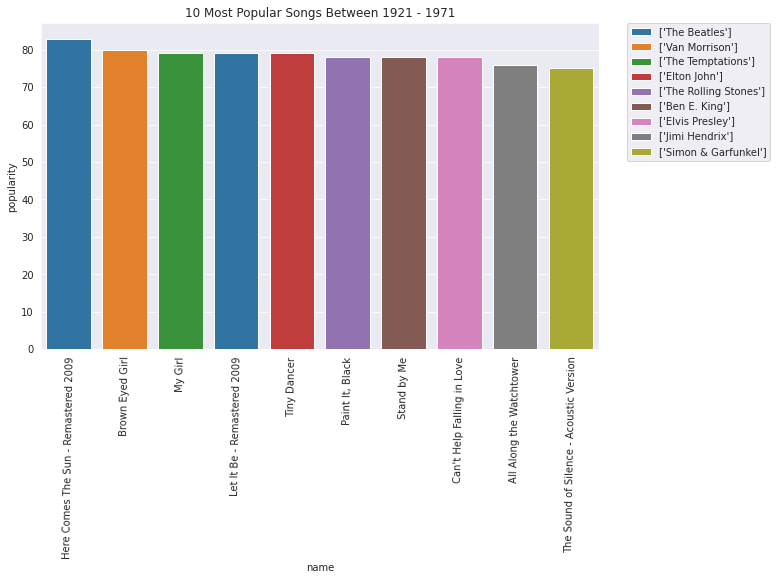

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

sns.barplot(x="name", y="popularity", data=pop_1900s, hue="artists", dodge=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks(rotation=89)
plt.title("10 Most Popular Songs Between 1921 - 1971")

***1972 - 2020***

Text(0.5, 1.0, '10 Most Popular Songs Between 1972 - 2020')

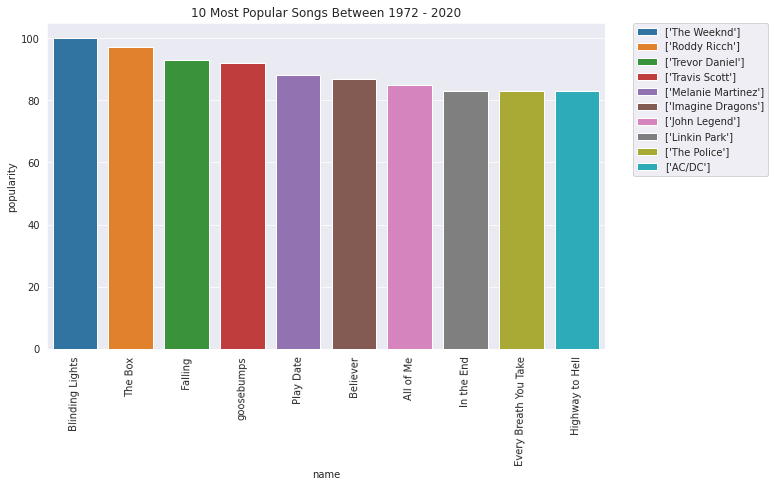

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

sns.barplot(x="name", y="popularity", data=pop_2000s, hue="artists", dodge=False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks(rotation=89)
plt.title("10 Most Popular Songs Between 1972 - 2020")

***No of Songs Per Year***

In [ ]:
year_add = spotify.groupby("year")["name"].count().to_frame()

Text(0.5, 1.0, 'No of Tracks Per Year')

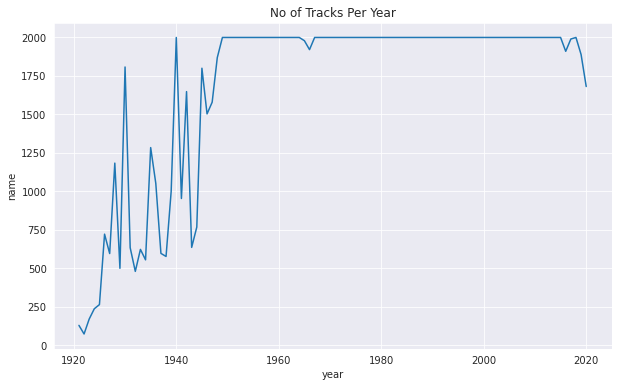

In [87]:
plt.figure(figsize=(10,6))

sns.lineplot(x=year_add.index, y="name", data=year_add)

plt.title("No of Tracks Per Year")

***Most Popular Artists***

In [88]:
artist.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,Francisco Canaro,0.983072,0.654711,177776.513454,0.292622,0.490675,0.201118,-11.733373,0.111007,123.608786,0.746469,0.054257,2,1,2267
1,Frédéric Chopin,0.989961,0.340087,251871.948502,0.106874,0.876899,0.155677,-22.575578,0.042913,90.977772,0.203644,5.748127,1,1,1068
2,Ludwig van Beethoven,0.955019,0.340157,439361.331606,0.153176,0.690770,0.164078,-20.107704,0.055550,104.833536,0.260255,5.237306,0,1,965
3,Wolfgang Amadeus Mozart,0.962084,0.353895,327808.037306,0.138348,0.514837,0.187091,-20.214154,0.067756,108.594920,0.332855,9.624870,7,1,965
4,Johann Sebastian Bach,0.958405,0.354224,203461.757872,0.201932,0.744322,0.165837,-20.936518,0.048844,106.551869,0.570526,14.704669,7,1,921


In [11]:
artists_pop =artist.groupby("artists")["popularity"].mean().to_frame().sort_values("popularity", ascending=False).head(10)

Text(0.5, 1.0, 'Most Popular Artists')

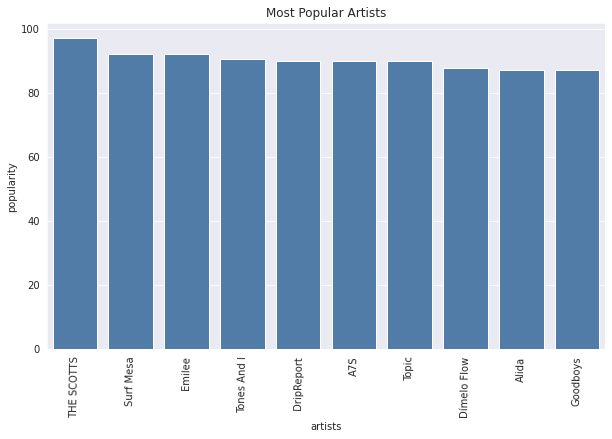

In [24]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

sns.barplot(x=artists_pop.index, y="popularity", data=artists_pop, color="#437CB6")

plt.xticks(rotation=89)
plt.title("Most Popular Artists")

***Track Explicity***

In [21]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


Text(0.5, 1.0, 'Track Explicity')

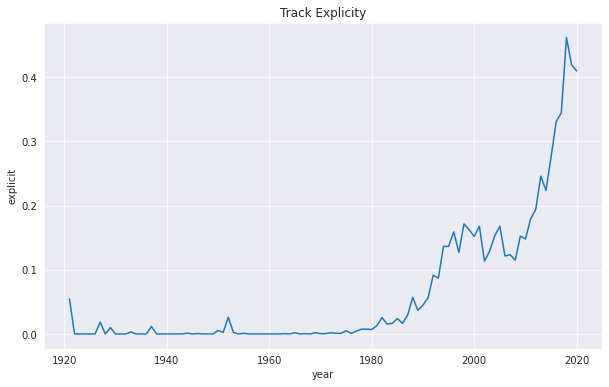

In [25]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

sns.lineplot(x="year", y="explicit", data=spotify, err_style=None)

plt.title("Track Explicity")